In [1]:
# Add a command to produce plots directly below cells.
%matplotlib inline
# Import required packages
import numpy as np
import os
# Import xarray and glob for data analysis.
import xarray as xr
from glob import glob
# Dask for processing
import dask as da

os.chdir("/home/561/gp8431")
from climate import StandardGrid
from climate import Projection

import matplotlib.pyplot as plt

# Change working directory.
os.chdir("/scratch/w40/gp8431/run")

In [2]:
# Extract era data
files = glob('/g/data/rt52/era5/single-levels/monthly-averaged/skt/*/*')
files.sort()

In [3]:
era_all_SKT = xr.open_mfdataset(files, combine='by_coords').skt #.rename({"t":"temp"})
#era_clim_SST = era_all_SST.groupby('time.month').mean('time')
era_clim_SKT = era_all_SKT.groupby('time.month').mean()
#era_clim_SST_lon = era_clim_SST.mean('longitude')

In [4]:
# Compute temperature/longitude anomaly in era data and adjust data.

# Adjust the data to OND.
era_anom_SKT = era_all_SKT.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim_SKT

era_anom_SKT = era_anom_SKT - era_anom_SKT.mean('longitude')

era_anom_SKT = era_anom_SKT.rename({"latitude":"lat", "longitude":"lon"})

era_anom_SKT = StandardGrid(era_anom_SKT, lon_name='lon', lat_name='lat')

era_anom_oct_SKT = era_anom_SKT.sel(time=slice('2019-10-01','2019-10-31'))

era_anom_OND_SKT = era_anom_SKT.sel(time=slice('2019-10-01','2019-12-31')).mean('time')

#era_anom['lon'] = (era_anom['lon'] + 180.0)

In [5]:
fig_era_SKT_OND = plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

In [6]:
era_anom_OND_SKT = era_anom_OND_SKT.sel(lat=slice(-90.0, 30.0))
ax_era_OND_SKT = fig_era_SKT_OND.add_subplot(1, 1, 1)
#cax_era_lon_p = ax_era_lon_p.pcolormesh(era_temp_anom_lon_p.lon, era_temp_anom_lon_p.pfull, era_temp_anom_lon_p.squeeze().values, vmin=-5, vmax=5)
era_anom_OND_SKT.plot(ax=ax_era_OND_SKT)
ax_era_OND_SKT.set(title = 'era_OND_SKT')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_SKT_OND.savefig('/home/561/gp8431/fig_era_SKT_OND.png')

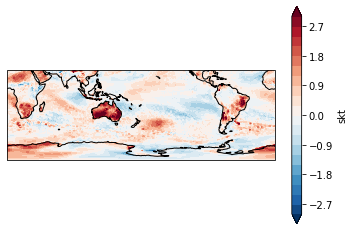

In [10]:
fig_proj_OND_SKT, ax, trans = Projection('PlateCarree', coast=True, kw_args={'central_longitude': 180})#fig_proj,ax = Projection()
era_anom_OND_SKT.squeeze().plot.contourf(ax=ax, cmap='RdBu_r', vmin=-3., vmax = 3., levels=21, **trans)
fig_proj_OND_SKT.savefig('/home/561/gp8431/fig_proj_OND_SKT.png')